In [2]:
from pathlib import Path
from typing import List, Dict, Optional, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from collections import defaultdict

# 1.Load data

In [39]:
annotations = pd.read_csv("../../results/HD_DIT_HAP/13_concatenated/annotations.tsv", sep="\t", index_col=[0,1,2,3])
in_gene_insertions = annotations.query("Type != 'Intergenic region' and Distance_to_stop_codon > 4").index

gene_clusters = pd.read_excel("../../resources/20250317_plateau_GWMs.xlsx")
WT_cluster_genes = gene_clusters.query("revised_cluster == 'WT'")["Systematic ID"].tolist()
in_WT_cluster_insertions = annotations.query("`Systematic ID` in @WT_cluster_genes").index

insertion_level_curve_fitting_results = pd.read_csv("../../results/HD_DIT_HAP/16_insertion_level_curve_fitting/insertions_LFC_fitted.csv", index_col=[0,1,2,3])

gene_level_curve_fitting_results = pd.read_csv("../../results/HD_DIT_HAP/18_gene_level_curve_fitting/Gene_level_statistics_fitted.csv", index_col=0)

# 2.Function for plotting

In [36]:
CUSTOM_COLORS = [
    '#962955',  # Deep pink-purple (primary)
    '#7fb775',  # Medium green (primary) 
    '#6479cc',  # Medium blue (primary)
    '#ad933c',  # Golden brown (primary)
    '#26b1fd',  # Bright blue
    '#8c397b',  # Medium purple
    '#9ab25d',  # Yellow-green
    '#48b7cd',  # Blue-cyan
    '#be6940',  # Orange-brown
    '#d3616e'   # Rose red
]

def setup_matplotlib_style() -> None:
    """Configure matplotlib with professional styling."""
    plt.style.use('default')
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
        'font.size': 10,
        'axes.linewidth': 1.2,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.linewidth': 0.8,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight'
    })

def create_histogram_plots(df: pd.DataFrame, columns: dict[str, np.ndarray], title: str) -> None:

    setup_matplotlib_style()

    fig_width = 4*len(columns)
    fig_height = 4
    
    fig, axes = plt.subplots(1, len(columns), figsize=(fig_width, fig_height))
    
    for idx, (column, col_bins) in enumerate(list(columns.items())):
        ax = axes[idx]
        
        data = df[column].dropna()
        
        # Create histogram
        color = CUSTOM_COLORS[idx % len(CUSTOM_COLORS)]
        n, bins_edges, patches = ax.hist(
            data, 
            bins=col_bins, 
            color=color, 
            alpha=0.8, 
            edgecolor='white', 
            linewidth=0.5
        )
        
        # Customize plot
        ax.set_title(column, fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Value', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        
        # Add statistics text box
        stats_text = f'n = {len(data):,}\nMean = {data.mean():.3f}\nStd = {data.std():.3f}'
        ax.text(0.45, 0.95, stats_text, transform=ax.transAxes, 
                verticalalignment='top', horizontalalignment='center', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        

    # Add overall title
    fig.suptitle(title, fontsize=16, fontweight='bold', y=0.98)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    plt.close()

# 3.Distribution plot

In [24]:
column_bins = {
    "A": np.linspace(-1, 10, 30),
    "um": np.linspace(-0.5, 2, 30),
    "lam": np.linspace(0, 14, 30),
    "R2": np.linspace(-1, 1, 30),
    "RMSE": np.linspace(0, 4, 30),
    "normalized_RMSE": np.linspace(0, 1, 30)
}

## Insertion-level curve fitting results

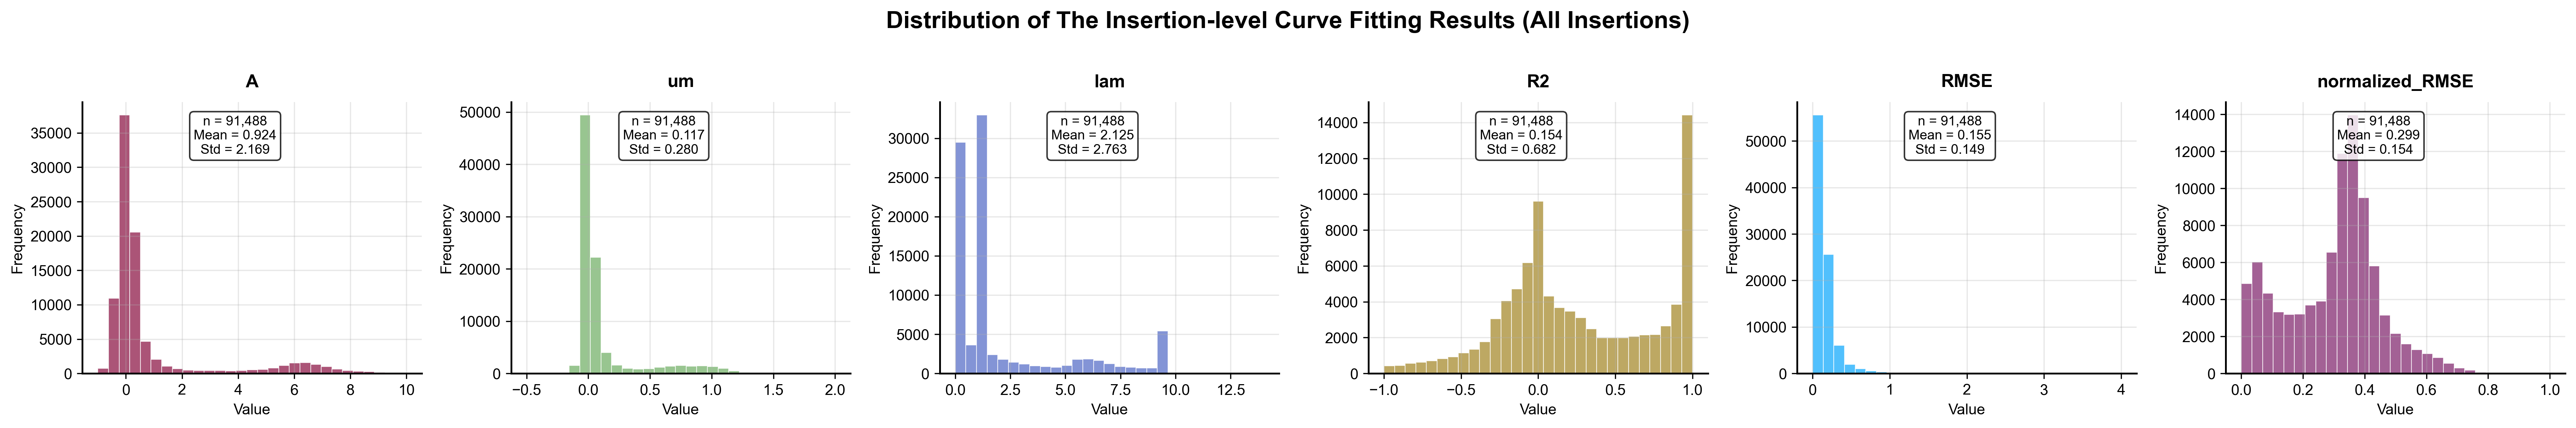

In [37]:
create_histogram_plots(insertion_level_curve_fitting_results, column_bins, "Distribution of The Insertion-level Curve Fitting Results (All Insertions)")

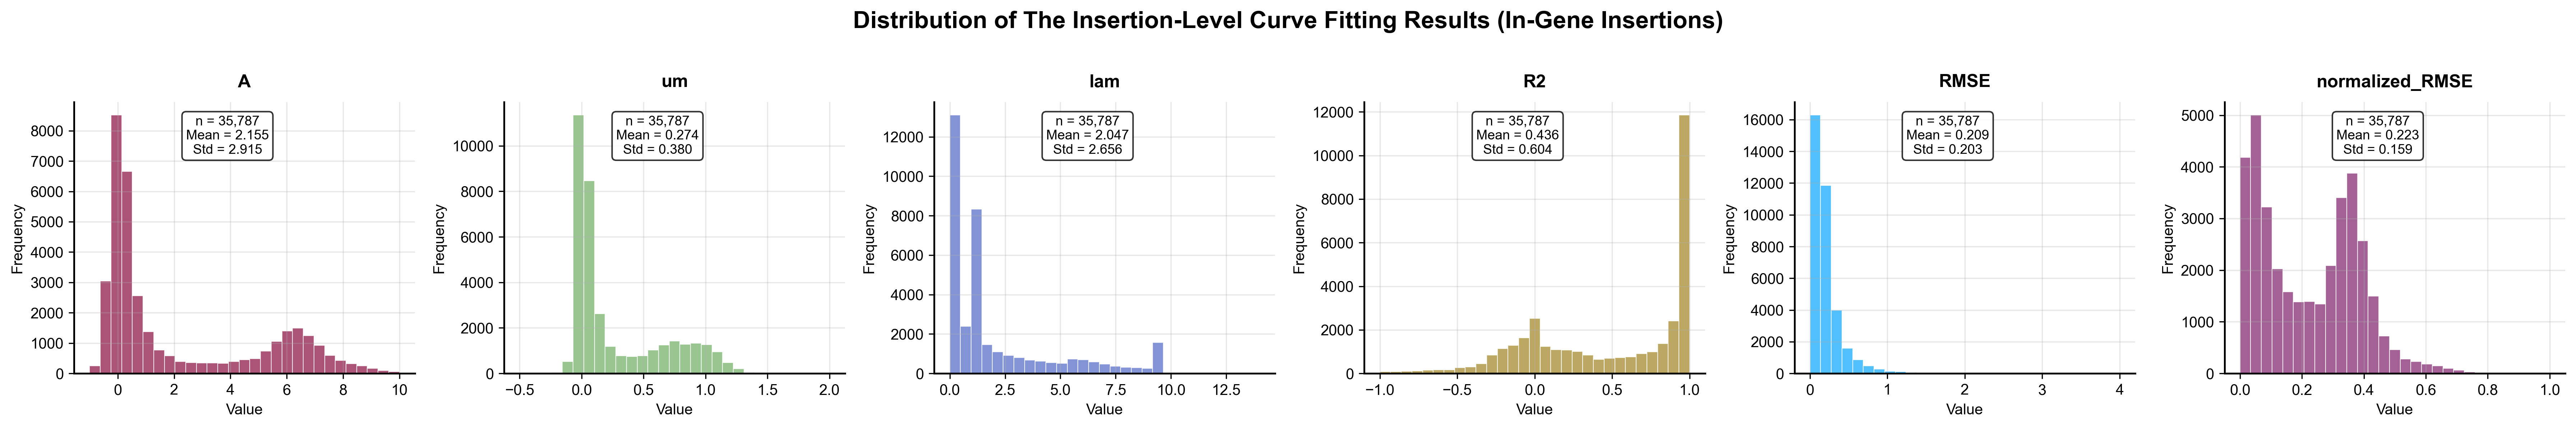

In [38]:
create_histogram_plots(insertion_level_curve_fitting_results[insertion_level_curve_fitting_results.index.isin(in_gene_insertions)], column_bins, "Distribution of The Insertion-Level Curve Fitting Results (In-Gene Insertions)")

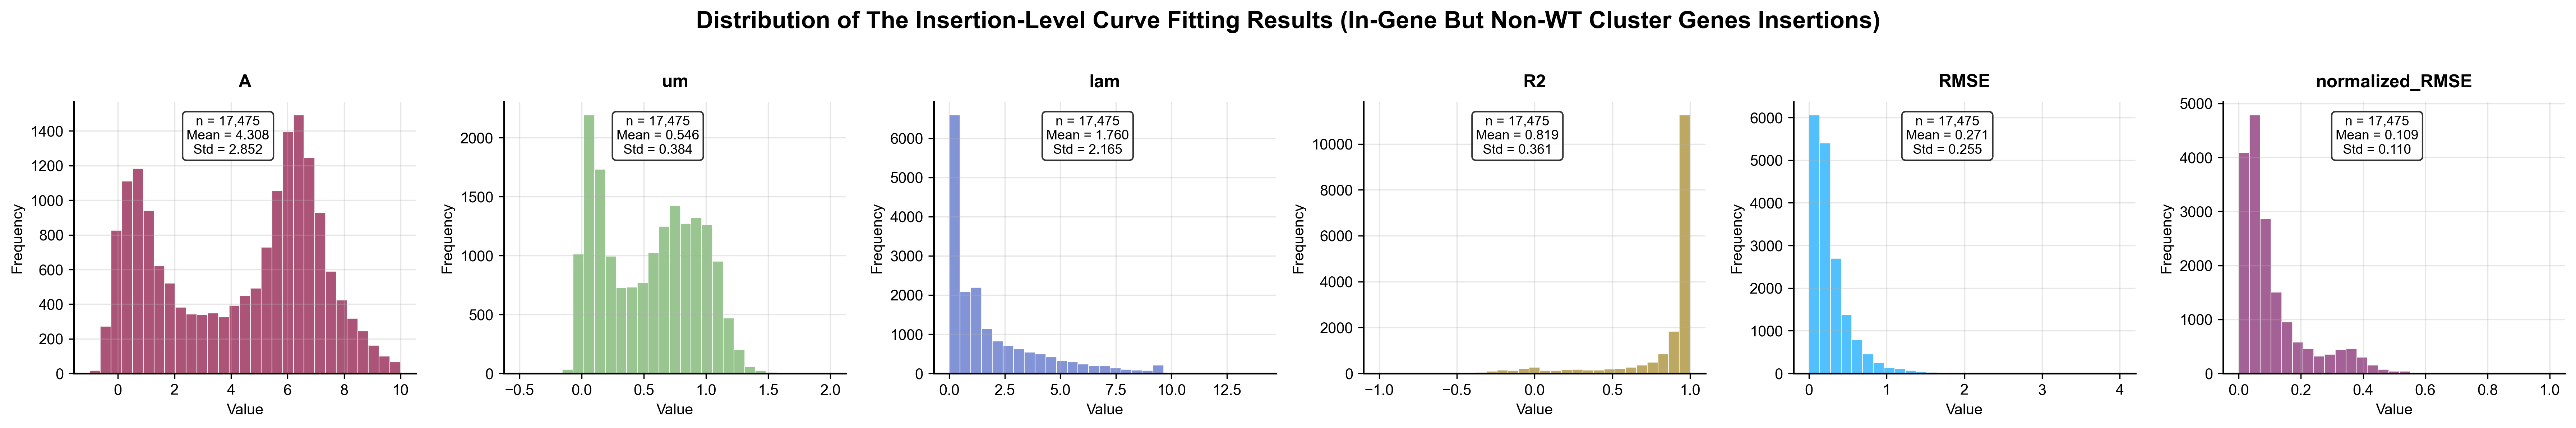

In [42]:
create_histogram_plots(insertion_level_curve_fitting_results[insertion_level_curve_fitting_results.index.isin(in_gene_insertions) & (~insertion_level_curve_fitting_results.index.isin(in_WT_cluster_insertions))], column_bins, "Distribution of The Insertion-Level Curve Fitting Results (In-Gene But Non-WT Cluster Genes Insertions)")

## Gene-level curve fitting results

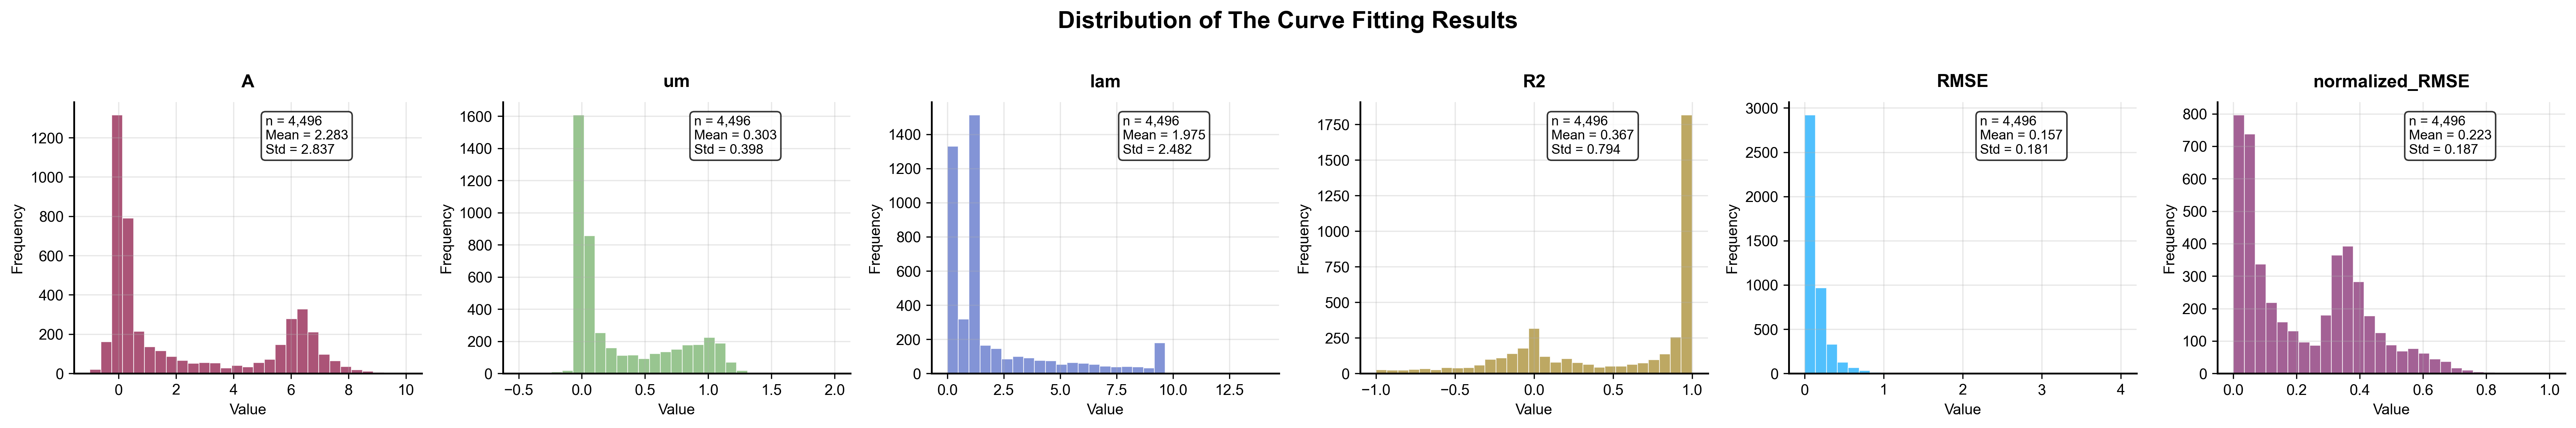

In [26]:
create_histogram_plots(gene_level_curve_fitting_results, column_bins)

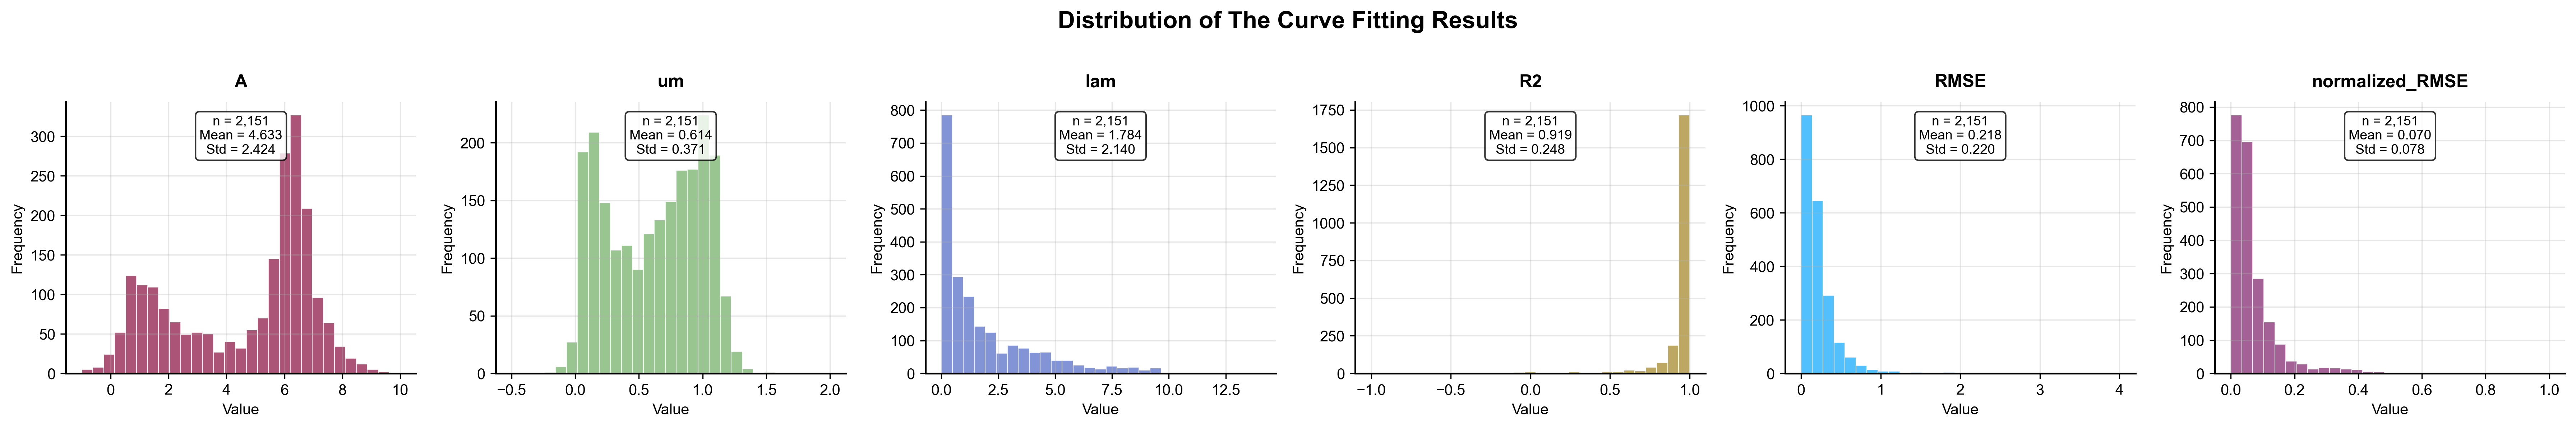

In [34]:
create_histogram_plots(gene_level_curve_fitting_results[~gene_level_curve_fitting_results.index.isin(WT_cluster_genes)], column_bins)